In [2]:
import numpy as np
np.float = np.float_
import matplotlib as m
import matplotlib.pyplot as plt
import copy as c
import pyemma
import pyemma.msm as msm
import pyemma.coordinates as coor
import pyemma.plots as mplt
import pickle as pkl

# Datas

In [3]:
dtrj = list(np.load('../../dtrajs_tica500_top2_kmean50.npy',allow_pickle=True))

In [4]:
cdata = np.concatenate(np.load('../../tica500.npy',allow_pickle=True))

In [4]:
clus50 = pkl.load(open('../../clustering50_tica500_top2.pkl','rb'))

In [5]:
path = '/home/jayakrishnak/hsp90/msahil/1_pbc_trajs/individual_trajs/'
traj_list = []
for i in [1,2,3]:
    traj_list.append(path+'apo_open_'+str(i)+'.xtc')
    traj_list.append(path+'apo_closed_'+str(i)+'.xtc')
#
top = coor.featurizer('../../../../apo_open.pdb')
trj_data = coor.source(traj_list,top)

Obtaining file info:   0%|                                                                                    …

# MSM

In [4]:
model1 = msm.estimate_markov_model(dtrj, lag=20 )

# Population

In [5]:
pcca_states = [2,3,4,5,6]

In [6]:
for i in pcca_states:
    model1.pcca(i)
    print('pcca: ',i)
    for a,b in enumerate(model1.metastable_sets):
        print(a,'\t',model1.pi[b].sum())
    print('')

pcca:  2
0 	 0.42546513063407904
1 	 0.5745348693659208

pcca:  3
0 	 0.189235834047322
1 	 0.23622929658675706
2 	 0.5745348693659208

pcca:  4
0 	 0.1187364985716183
1 	 0.14451472123148346
2 	 0.16221391083097725
3 	 0.5745348693659208

pcca:  5
0 	 0.0663715021827338
1 	 0.508163367183187
2 	 0.1187364985716183
3 	 0.16221391083097725
4 	 0.14451472123148346

pcca:  6
0 	 0.014998631381294116
1 	 0.1187364985716183
2 	 0.06340162702708571
3 	 0.14451472123148346
4 	 0.16221391083097725
5 	 0.49613461095754097



# states

In [8]:
m.rcParams['axes.linewidth']=2.6

In [22]:
np.histogram2d?

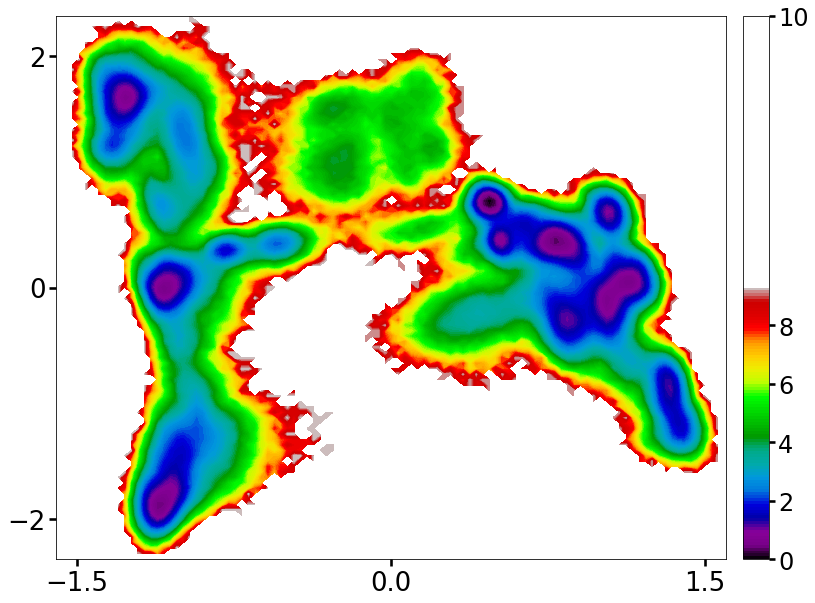

In [7]:
fig,ax = plt.subplots(1,figsize=(12,10))
cax=fig.add_axes([0.92,0.125,0.03,0.755])
mplt.plot_free_energy(cdata[:,0],cdata[:,1],weights=np.concatenate(model1.trajectory_weights()),ax=ax,cax=cax,cbar_label=None)
ax.set_xlim(-1.6,1.6)
ax.set_xticks([-1.5,0,1.5])
ax.set_ylim(-2.35,2.35)
ax.set_yticks([-2,0,2])
ax.tick_params(labelsize=26,length=7,width=2.6)
cax.yaxis.set_tick_params(labelsize=24,length=6,width=2.6)
cax.set_yticks([0,2,4,6,8,10])
#
plt.show()

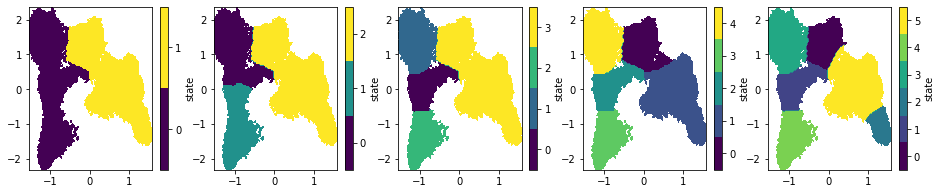

In [8]:
fig,ax=plt.subplots(1,5,figsize=(16,3))
for i in range(len(pcca_states)):
    model1.pcca(pcca_states[i])
    mplt.plot_state_map(cdata[:,0],cdata[:,1],model1.metastable_assignments[np.concatenate(model1.dtrajs_active)],ax=ax[i])

In [9]:
mfpt = np.zeros((6,6))
for i in range(6):
    for j in range(6):
        mfpt[i,j] = model1.mfpt(model1.metastable_sets[i],model1.metastable_sets[j])

In [10]:
(mfpt * 20 * 10 * 10**(-6) )

array([[ 0.        ,  7.58239437,  9.10471294, 12.49445513, 19.74997088,
         4.59740704],
       [13.67562409,  0.        , 15.09897217,  6.6846025 ,  9.3068755 ,
        10.64448508],
       [13.9219729 , 13.49309756,  0.        , 19.98150549, 26.07321886,
         0.19439532],
       [12.78900224,  3.09685849, 15.65110853,  0.        , 13.19760405,
        11.18671562],
       [16.18273651,  1.77136433, 17.69879457,  8.69319515,  0.        ,
        13.24366942],
       [13.40678824, 12.99541479,  3.56771519, 19.48045506, 25.57465422,
         0.        ]])

fig,ax = plt.subplots(1,figsize=(12,10))
cax=fig.add_axes([0.92,0.125,0.03,0.755])
mplt.plot_state_map(cdata[:,0],cdata[:,1],model1.metastable_assignments[np.concatenate(model1.dtrajs_active)],ax=ax,cax=cax,cbar_label=None)
ax.set_xlim(-1.6,1.6)
ax.set_xticks([-1.5,0,1.5])
ax.set_ylim(-2.35,2.35)
ax.set_yticks([-2,0,2])
ax.tick_params(labelsize=26,length=7,width=2.6)
cax.yaxis.set_tick_params(labelsize=24,length=6,width=2.6)
#
plt.savefig('pcca6/final_images/state-map.pdf')
plt.show()

# random frame extraction

In [11]:
nframes=1000
for i in pcca_states:
    model1.pcca(i)
    pcca_distr = model1.metastable_distributions
    random_samples = model1.sample_by_distributions(pcca_distr,nframes)
    for j in range(i):
        coor.save_traj(trj_data,random_samples[j],'pcca'+str(i)+'/random/state'+str(j)+'.xtc')

09-08-22 09:30:32 pyemma.coordinates.api INFO     Created file pcca2/random/state0.xtc
09-08-22 09:30:50 pyemma.coordinates.api INFO     Created file pcca2/random/state1.xtc
09-08-22 09:31:10 pyemma.coordinates.api INFO     Created file pcca3/random/state0.xtc
09-08-22 09:31:32 pyemma.coordinates.api INFO     Created file pcca3/random/state1.xtc
09-08-22 09:31:58 pyemma.coordinates.api INFO     Created file pcca3/random/state2.xtc
09-08-22 09:32:16 pyemma.coordinates.api INFO     Created file pcca4/random/state0.xtc
09-08-22 09:32:36 pyemma.coordinates.api INFO     Created file pcca4/random/state1.xtc
09-08-22 09:32:57 pyemma.coordinates.api INFO     Created file pcca4/random/state2.xtc
09-08-22 09:33:18 pyemma.coordinates.api INFO     Created file pcca4/random/state3.xtc
09-08-22 09:33:38 pyemma.coordinates.api INFO     Created file pcca5/random/state0.xtc
09-08-22 09:33:58 pyemma.coordinates.api INFO     Created file pcca5/random/state1.xtc
09-08-22 09:34:17 pyemma.coordinates.api IN

# microstates in macrostates

In [12]:
micro_pop = { i[0]:i[1] for i in np.loadtxt('../../micro_pop_tica500_clus50_top2.txt',dtype='int')}
for i in pcca_states:
    model1.pcca(i)
    print('\n\n pcca: ',i)
    n=-1
    for j in model1.metastable_sets:
        n+=1
        kk = {k:micro_pop[k] for k in j}
        sk = np.array(sorted(kk.items(), reverse=True, key=lambda kv:(kv[1],kv[0])))
        ss = np.sum(sk[:,1])
        plist = [[k[0],np.round(k[1]/ss,3)] for k in sk]
        print(plist)
        print('')
        np.savetxt('pcca'+str(i)+'/micro_pop/state'+str(n)+'.txt',plist,fmt='%d'+'%12.3f')



 pcca:  2
[[48, 0.213], [41, 0.135], [2, 0.13], [18, 0.124], [30, 0.096], [32, 0.087], [8, 0.078], [46, 0.058], [25, 0.041], [34, 0.037]]

[[3, 0.06], [35, 0.049], [14, 0.041], [49, 0.041], [40, 0.04], [27, 0.038], [28, 0.037], [1, 0.036], [21, 0.034], [7, 0.033], [23, 0.033], [45, 0.031], [39, 0.029], [24, 0.028], [11, 0.027], [19, 0.027], [6, 0.026], [16, 0.025], [5, 0.025], [31, 0.024], [36, 0.023], [37, 0.023], [33, 0.022], [47, 0.02], [10, 0.02], [42, 0.02], [26, 0.019], [20, 0.019], [22, 0.017], [38, 0.017], [43, 0.015], [0, 0.014], [15, 0.013], [12, 0.013], [4, 0.013], [17, 0.013], [44, 0.01], [9, 0.009], [29, 0.009], [13, 0.007]]



 pcca:  3
[[48, 0.222], [41, 0.141], [2, 0.136], [18, 0.13], [30, 0.1], [32, 0.091], [8, 0.082], [46, 0.06], [34, 0.039]]

[[35, 0.152], [49, 0.128], [21, 0.106], [11, 0.083], [5, 0.078], [36, 0.071], [42, 0.061], [26, 0.058], [20, 0.058], [22, 0.053], [0, 0.042], [15, 0.042], [4, 0.04], [25, 0.028]]

[[3, 0.088], [14, 0.06], [40, 0.059], [27, 0.0

In [65]:
ck6 = model1.cktest(nsets=6,n_jobs=16)

estimating MaximumLikelihoodMSM:   0%|                                                                        …

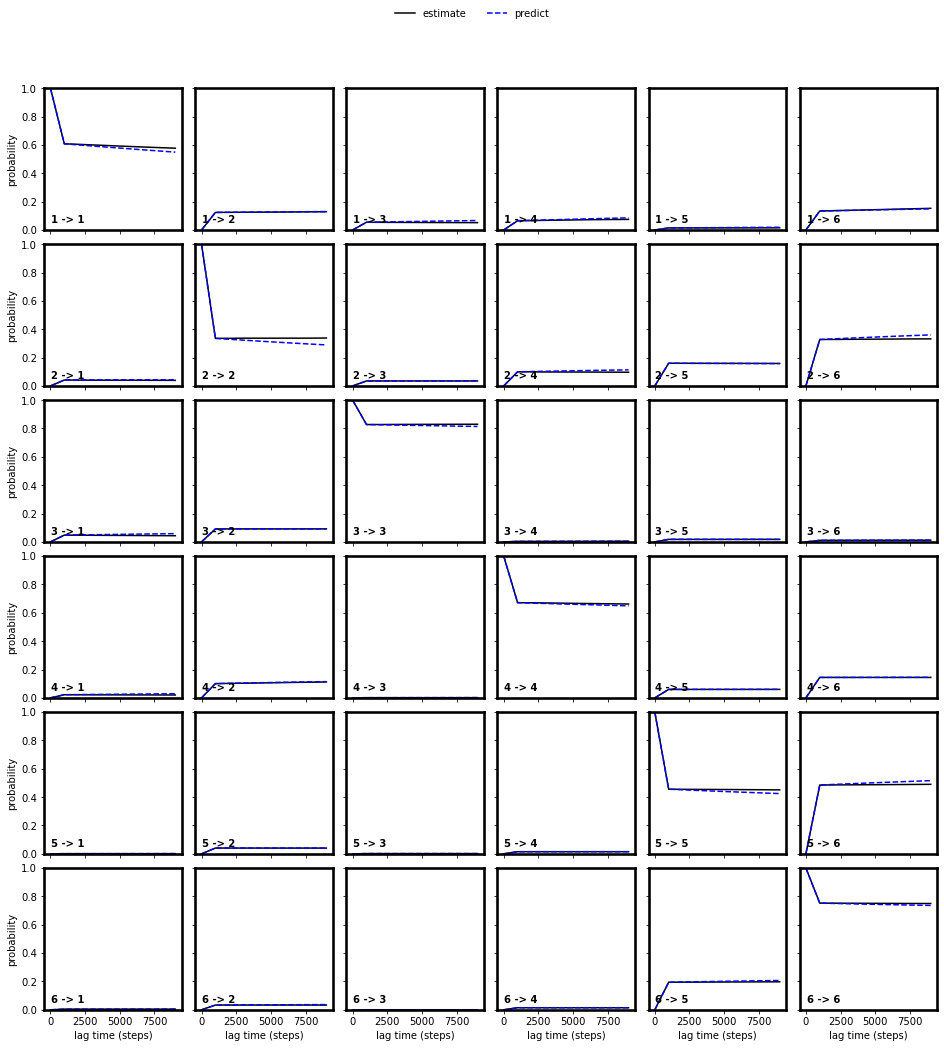

In [70]:
mplt.plot_cktest(ck6,figsize=(16,16))
#
plt.savefig('pcca6/final_images/cktest.pdf')
plt.show()

# plotting

In [12]:
model20 = msm.estimate_markov_model(dtrj, lag=20)

In [6]:
kt= 0.617

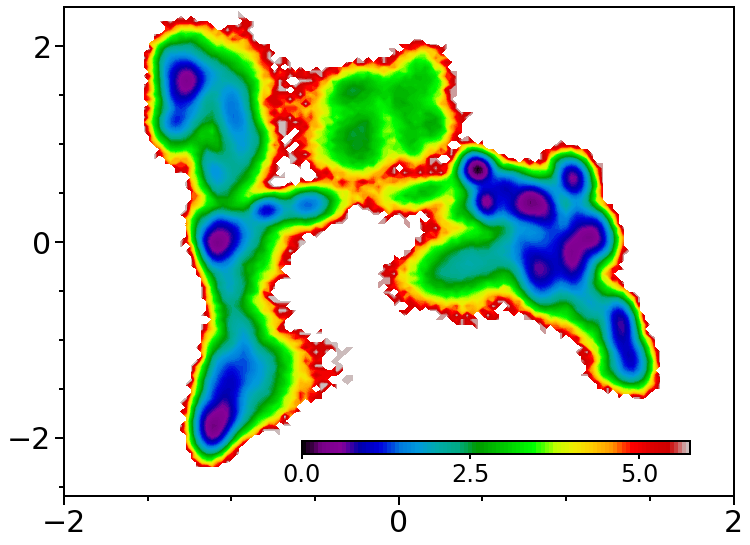

In [22]:
fig, ax = plt.subplots(1, figsize=(12,9))
cax=fig.add_axes([0.4,0.19,0.45,0.02])
mplt.plot_free_energy(cdata[:,0], cdata[:,1], weights=np.concatenate(model20.trajectory_weights()),
                      ax=ax, cax=cax, kT=kt, cbar_label=None, cbar_orientation='horizontal')
ax.set_xlim(-2,2)
ax.set_ylim(-2.6,2.4)
ax.tick_params(labelsize=30, length=9, width=2)
cax.tick_params(labelsize=24, length=5, width=2)
ax.spines[:].set_linewidth(2)
cax.spines[:].set_linewidth(2)
cax.set_xticks([0,2.5,5])
ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)

plt.savefig('weighted_energy.pdf')
plt.show()

In [14]:
model20.pcca(6)

PCCA(P=array([[8.20707e-01, 0.00000e+00, ..., 0.00000e+00, 2.09025e-04],
       [0.00000e+00, 4.27000e-01, ..., 0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, ..., 4.49060e-01, 0.00000e+00],
       [7.04135e-05, 0.00000e+00, ..., 0.00000e+00, 5.47822e-01]]),
   m=6)

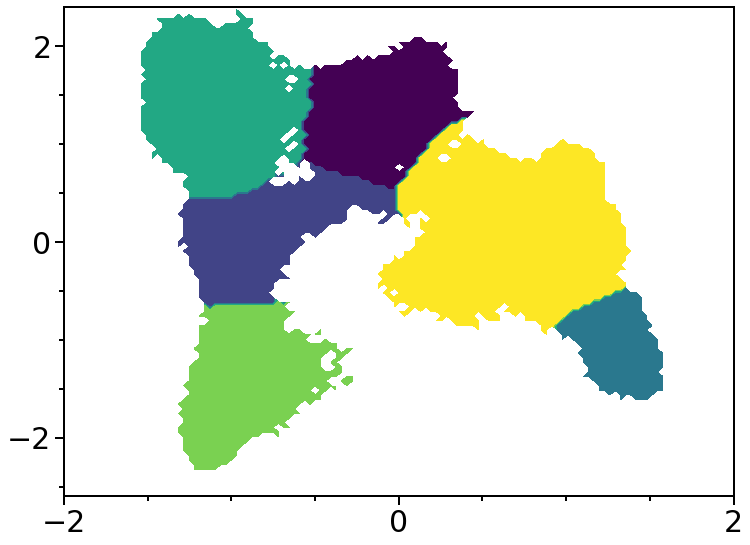

In [24]:
fig, ax = plt.subplots(1, figsize=(12,9))
mplt.plot_state_map( cdata[:,0], cdata[:,1],
                    model20.metastable_assignments[np.concatenate((model20.dtrajs_active))],
                   ax=ax, cbar=False)

ax.set_xlim(-2,2)
ax.set_ylim(-2.6,2.4)
ax.tick_params(labelsize=30, length=9, width=2)
cax.tick_params(labelsize=24, length=5, width=2)
ax.spines[:].set_linewidth(2)
ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
plt.savefig('state_map.pdf')
plt.show()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7f5a84baa130>,
  'cbar': <matplotlib.colorbar.Colorbar at 0x7f5a848fe4c0>})

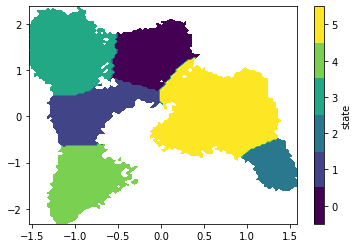

In [163]:
mplt.plot_state_map(cdata[:,0], cdata[:,1],
                    model20.metastable_assignments[np.concatenate((model20.dtrajs_active))], cmap=cc)

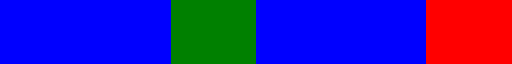

In [31]:
cc=m.colors.LinearSegmentedColormap.from_list('cc',['blue','blue','green','blue','blue','red'], N=6)
cc

## bootstrapping

In [7]:
dtrj=np.array(dtrj)

In [9]:
niter=10
npcca=6
populations = np.zeros((niter, npcca))
committors = np.zeros((niter, npcca))
mfpts = np.zeros((niter,npcca,npcca))
pathways=[]
fpathways=[]
diffs = np.zeros((niter))
mini=0.01
maxi=0.1
sind=0
eind=2

for i in range(niter):
    rant = np.random.randint(dtrj.shape[0])
    rans = mini + np.random.random()*(maxi-mini)
    rans = int(np.floor(dtrj[rant].shape[0] * rans))
    rand = [-1,1][np.random.randint(0,2)]
    ndata = c.deepcopy(dtrj)
    if rand==1:
        ndata[rant] = ndata[rant][:-rans]
    else:
        ndata[rant] = ndata[rant][rans:]
    #
    nmodel = msm.estimate_markov_model(list(ndata), lag=20)
    nmodel.pcca(npcca)
    #
    dmt=np.zeros((npcca, npcca))
    psets = []
    diff=0
    for j in range(npcca):
        for k in range(npcca):
            dmt[j][k] = np.setdiff1d(model20.metastable_sets[j], nmodel.metastable_sets[k]).shape[0]
        psets.append(nmodel.metastable_sets[np.argmin(dmt[j])])
        diff += np.min(dmt[j])
    diffs[i] = diff
    #
    for k in range(npcca):
        populations[i][k] = nmodel.pi[psets[k]].sum()
        for j in range(npcca):
            mfpts[i][k][j] = nmodel.mfpt(psets[k], psets[j]) * 20 * 10 * 10**(-6)
    #
    tpt = msm.tpt(nmodel, psets[sind], psets[eind])
    cg, cgflux = tpt.coarse_grain(nmodel.metastable_sets)
    committors[i] = cgflux.committor
    paths, pathfluxes = cgflux.pathways(fraction=0.99)
    pathfluxes = pathfluxes/np.sum(pathfluxes)
    pathways.append(paths)
    fpathways.append(pathfluxes)

In [26]:
mfpts.shape

(10, 6, 6)

In [27]:
np.save('mfpt.npy', mfpts)
np.save('pops.npy',  populations)

In [10]:
dd = model20.metastable_assignments[np.concatenate((model20.dtrajs_active))]
metastable_dtrj = []
k=0
for i in range(len(dtrj)):
    di = []
    for j in range(len(dtrj[i])):
        di.append(dd[k])
        k += 1
    metastable_dtrj.append(di)

In [11]:
metastable_model = msm.estimate_markov_model(list(metastable_dtrj), lag=20)

In [13]:
positions = np.array([
    [0,0],
    [-1,-1],
    [1,-2],
    [-1,0],
    [-1,-2],
    [0.6,-1]
])
names = np.array(['C','C2','O','C1','C3','I'])

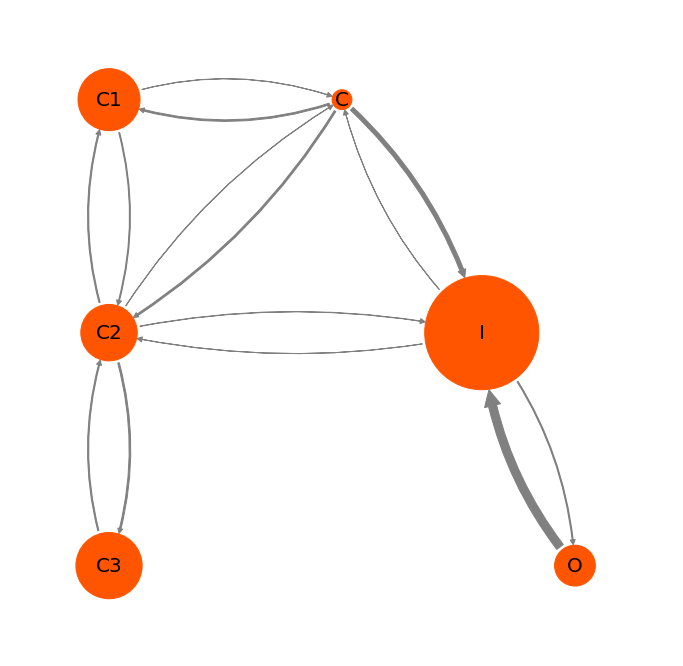

In [14]:
fig,ax=plt.subplots(1,figsize=(12,12))
mplt.plot_markov_model(metastable_model, pos=positions, state_labels=names, ax=ax,
                      arrow_scale=2, arrow_labels=None, size=20)
plt.savefig('network.pdf')
plt.show()

In [19]:
np.round(np.mean(mfpts, axis=0),2)

array([[ 0.  ,  7.55,  9.08, 12.7 , 20.88,  4.58],
       [13.61,  0.  , 15.04,  7.2 , 10.47, 10.6 ],
       [13.8 , 13.38,  0.  , 20.18, 27.12,  0.19],
       [12.67,  3.26, 15.61,  0.  , 14.57, 11.16],
       [16.42,  2.06, 17.93,  9.51,  0.  , 13.49],
       [13.29, 12.88,  3.54, 19.68, 26.62,  0.  ]])

In [20]:
np.round(np.std(mfpts, axis=0),2)

array([[0.  , 0.21, 0.06, 1.1 , 3.09, 0.03],
       [0.1 , 0.  , 0.12, 1.74, 2.77, 0.1 ],
       [0.08, 0.17, 0.  , 1.32, 3.04, 0.  ],
       [0.15, 0.55, 0.09, 0.  , 3.46, 0.07],
       [0.65, 0.59, 0.5 , 2.28, 0.  , 0.52],
       [0.08, 0.17, 0.03, 1.32, 3.04, 0.  ]])

In [36]:
np.mean(populations*100, axis=0).round(2)

array([ 1.51, 11.92,  6.4 , 14.53, 16.3 , 49.34])

In [35]:
np.std(populations*100, axis=0).round(2)

array([0.01, 0.17, 0.02, 0.17, 0.32, 0.4 ])